# GRIP:THE SPARKS FOUNDATION

# Task 3 - To Explore Unsupervised Machine Learning

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

# Importing Dataset

In [40]:
data = pd.read_csv(r'C:\Users\Kullu\Downloads\Iris.csv')
print('Data imported successfully')
data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data Exploration

In [24]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [29]:
data.shape

(150, 4)

In [33]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Relationship between Features

Text(0, 0.5, 'sepal width (cm)')

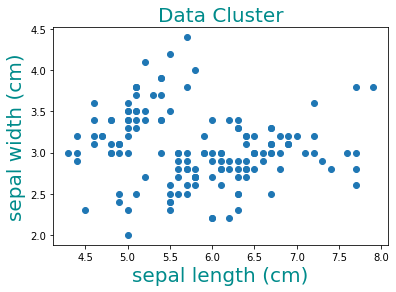

In [62]:
plt.title('Data Cluster', fontsize=20, color = 'darkcyan')
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('sepal length (cm)', fontsize=20, color = 'darkcyan')
plt.ylabel('sepal width (cm)', fontsize=20, color = 'darkcyan')

# Building Correlation Matrix

<AxesSubplot:>

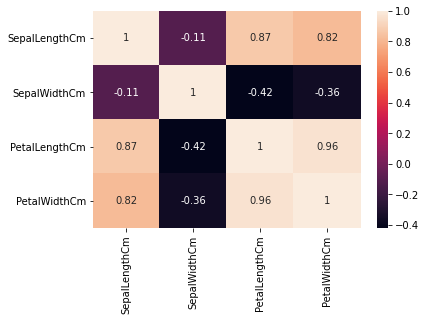

In [67]:
new_data = data.drop('Id', axis = 1)
sns.heatmap(new_data.corr(), annot = True)

# Plotting Pair Plots

c:\users\kullu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


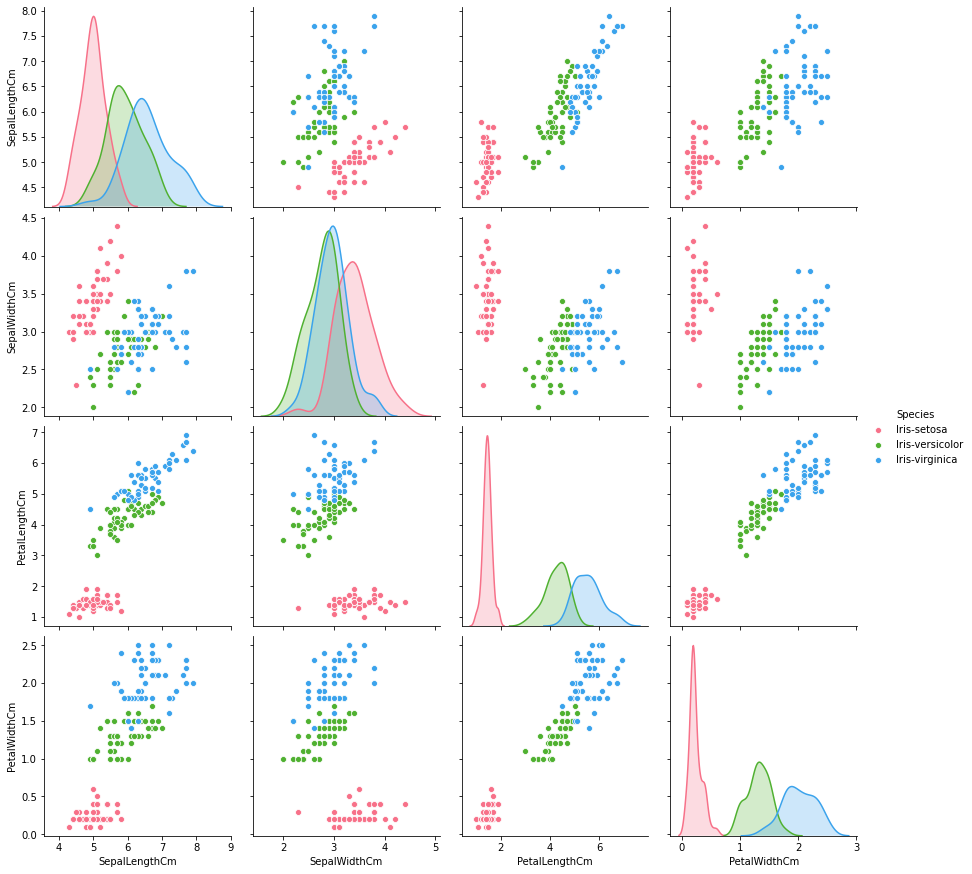

In [51]:
sns.pairplot(new_data, hue="Species", palette="husl", size=3, diag_kind="kde")

# Training the algorithm

In [53]:
x = data.iloc[:, [1, 2, 3, 4]].values

In [55]:
from sklearn.cluster import KMeans
WCSS = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

WCSS

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

# Using Elbow method to find K

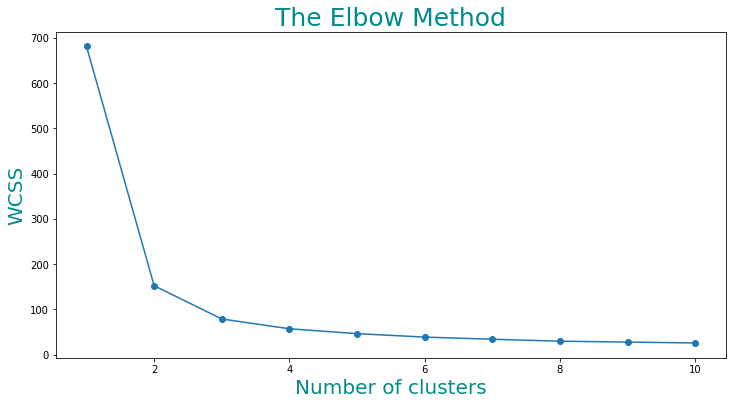

In [59]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), WCSS, marker='o')
plt.title('The Elbow Method', fontsize=25, color = 'darkcyan')
plt.xlabel('Number of clusters', fontsize=20, color = 'darkcyan')
plt.ylabel('WCSS', fontsize=20, color = 'darkcyan')
plt.show()

# Prediction

In [69]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, random_state = 0)
kmeans.fit(x)
pred = kmeans.predict(x)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# Number of Observation in 3 Clusters

In [71]:
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

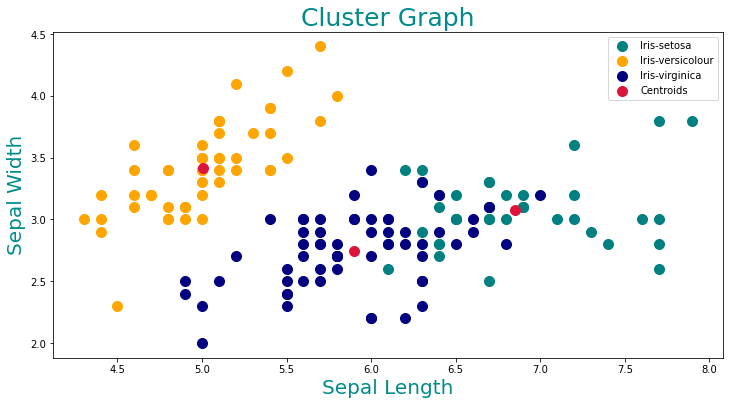

In [79]:
plt.figure(figsize=(12,6))
plt.title('Cluster Graph', fontsize=25, color = 'darkcyan')
plt.xlabel('Sepal Length', fontsize=20, color = 'darkcyan')
plt.ylabel('Sepal Width', fontsize=20, color = 'darkcyan')

plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'teal', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'navy', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'crimson', label = 'Centroids')

plt.legend()

# Clusters for Petal Length and Petal Width

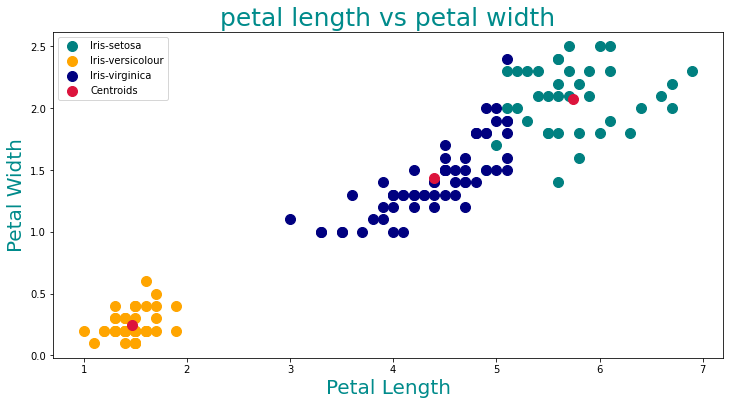

In [81]:
plt.figure(figsize=(12,6))
plt.title('petal length vs petal width', fontsize=25, color = 'darkcyan')
plt.xlabel('Petal Length', fontsize=20, color = 'darkcyan')
plt.ylabel('Petal Width', fontsize=20, color = 'darkcyan')

plt.scatter(x[pred == 0, 2], x[pred == 0, 3], 
            s = 100, c = 'teal', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 2], x[pred == 1, 3], 
            s = 100, c = 'orange', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 2], x[pred == 2, 3],
            s = 100, c = 'navy', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'crimson', label = 'Centroids')

plt.legend()

# Clusters for Sepal Length and Sepal Width

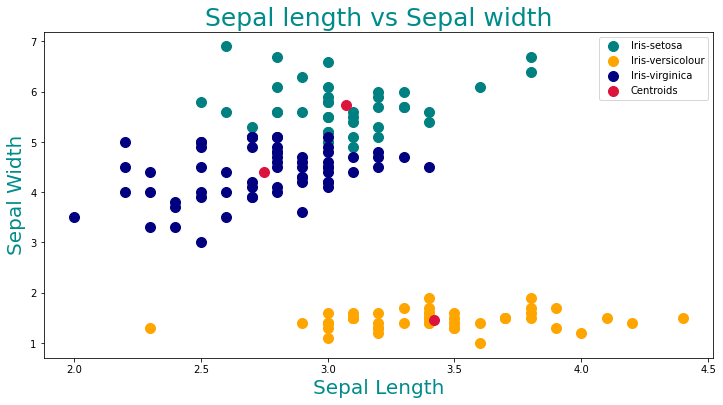

In [83]:
plt.figure(figsize=(12,6))
plt.title('Sepal length vs Sepal width', fontsize=25, color = 'darkcyan')
plt.xlabel('Sepal Length', fontsize=20, color = 'darkcyan')
plt.ylabel('Sepal Width', fontsize=20, color = 'darkcyan')

plt.scatter(x[pred == 0, 1], x[pred == 0, 2], 
            s = 100, c = 'teal', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 1], x[pred == 1, 2], 
            s = 100, c = 'orange', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 1], x[pred == 2, 2],
            s = 100, c = 'navy', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'crimson', label = 'Centroids')

plt.legend()